In [15]:
pip install yfinance as yf

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [16]:
pip install pandas as pd

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [17]:
import yfinance as yf
import pandas as pd

# Define el activo
activo = yf.Ticker("MSFT")

# Define las fechas de inicio y fin
fecha_inicio = "2024-01-01"
fecha_fin = None  # None indica que queremos los datos hasta la fecha actual

# Obtén los datos históricos
data_historica = activo.history(start=fecha_inicio, end=fecha_fin, interval="1d")

data_historica


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,372.498019,374.530595,365.433851,369.518921,25258600,0.0,0.0
2024-01-03 00:00:00-05:00,367.665704,371.900222,367.167526,369.249908,23083500,0.0,0.0
2024-01-04 00:00:00-05:00,369.319644,371.740784,365.832395,366.599579,20901500,0.0,0.0
2024-01-05 00:00:00-05:00,367.625835,370.704574,365.164832,366.410278,20987000,0.0,0.0
2024-01-08 00:00:00-05:00,367.954633,373.833164,367.665712,373.325012,23134000,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-25 00:00:00-04:00,448.250000,451.420013,446.750000,450.950012,16747500,0.0,0.0
2024-06-26 00:00:00-04:00,449.000000,453.600006,448.190002,452.160004,16507000,0.0,0.0
2024-06-27 00:00:00-04:00,452.179993,456.170013,451.769989,452.850006,14806300,0.0,0.0


In [18]:
data_historica = data_historica[data_historica["High"]!=data_historica["Low"]]
data_historica.reset_index(inplace=True)
data_historica

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-01-02 00:00:00-05:00,372.498019,374.530595,365.433851,369.518921,25258600,0.0,0.0
1,2024-01-03 00:00:00-05:00,367.665704,371.900222,367.167526,369.249908,23083500,0.0,0.0
2,2024-01-04 00:00:00-05:00,369.319644,371.740784,365.832395,366.599579,20901500,0.0,0.0
3,2024-01-05 00:00:00-05:00,367.625835,370.704574,365.164832,366.410278,20987000,0.0,0.0
4,2024-01-08 00:00:00-05:00,367.954633,373.833164,367.665712,373.325012,23134000,0.0,0.0
...,...,...,...,...,...,...,...,...
120,2024-06-25 00:00:00-04:00,448.250000,451.420013,446.750000,450.950012,16747500,0.0,0.0
121,2024-06-26 00:00:00-04:00,449.000000,453.600006,448.190002,452.160004,16507000,0.0,0.0
122,2024-06-27 00:00:00-04:00,452.179993,456.170013,451.769989,452.850006,14806300,0.0,0.0
123,2024-06-28 00:00:00-04:00,453.070007,455.380005,446.410004,446.950012,28333300,0.0,0.0


In [19]:
def rejection_signal(df): 
    #bullish signal
    if ( df.Open.iloc[-1] < df.Close.iloc[-1] and
       (df.High.iloc[-1] - df.Close.iloc[-1]) < abs(df.Open.iloc[-1]-df.Close.iloc[-1])/10 and
       (df.Open.iloc[-1] - df.Low.iloc[-1]) > abs(df.Open.iloc[-1]-df.Close.iloc[-1])*5):
        return 2
    
    #bearish signal
    elif ( df.Open.iloc[-1] > df.Close.iloc[-1] and
       (df.High.iloc[-1] - df.Open.iloc[-1]) > abs(df.Open.iloc[-1]-df.Close.iloc[-1])*5 and
       (df.Close.iloc[-1] - df.Low.iloc[-1]) < abs(df.Open.iloc[-1]-df.Close.iloc[-1])/10):
        return 1
    
    #nosignal
    else:
        return 0

def engulfing_signal(df):
    # Get the current and previous candles
    previous_candle = df.iloc[-2]
    current_candle = df.iloc[-1]

    # Check for bullish engulfing
    if ( (current_candle['Close'] > previous_candle['Open']) 
        and (current_candle['Open'] < previous_candle['Close'])
        and (previous_candle['Open'] > previous_candle['Close']) ):
        return 2

    # Check for bearish engulfing
    elif ( (current_candle['Open'] > previous_candle['Close']) 
          and (current_candle['Close'] < previous_candle['Open']) 
          and (previous_candle['Close'] > previous_candle['Open']) ):
        return 1

    # Return 0 for any other case
    else:
        return 0
    

signal = [0]*len(data_historica)
for i in range(3,len(data_historica)):
    df = data_historica[i-3:i+1]
    signal[i]= rejection_signal(df)
data_historica["rejection_signal"] = signal

signal = [0]*len(data_historica)
for i in range(1,len(data_historica)):
    df = data_historica[i-1:i+1]
    signal[i]= engulfing_signal(df)
data_historica["engulfing_signal"] = signal

In [20]:
up_count = 0
down_count = 0
total_count = 0

for i in range(len(data_historica) - 1):
    if data_historica.engulfing_signal.iloc[i] == 1:
        total_count += 1
        if data_historica.Close.iloc[i+1] >data_historica.Open.iloc[i+1]:
            up_count += 1
        elif data_historica.Close.iloc[i+1] < data_historica.Open.iloc[i+1]:
            down_count += 1

up_percentage = (up_count / total_count) * 100
down_percentage = (down_count / total_count) * 100

In [21]:
print(up_percentage, down_percentage, total_count)

66.66666666666666 33.33333333333333 6


In [22]:
data_historica[data_historica["engulfing_signal"]==1]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,rejection_signal,engulfing_signal
2,2024-01-04 00:00:00-05:00,369.319644,371.740784,365.832395,366.599579,20901500,0.0,0.0,0,1
64,2024-04-04 00:00:00-04:00,424.224809,427.898206,416.818185,417.127625,19370900,0.0,0.0,0,1
73,2024-04-17 00:00:00-04:00,416.498743,418.125813,409.591189,411.098480,15855500,0.0,0.0,0,1
99,2024-05-23 00:00:00-04:00,432.970001,433.600006,425.420013,427.000000,17211700,0.0,0.0,0,1
109,2024-06-07 00:00:00-04:00,426.200012,426.279999,423.000000,423.850006,13621700,0.0,0.0,0,1
123,2024-06-28 00:00:00-04:00,453.070007,455.380005,446.410004,446.950012,28333300,0.0,0.0,0,1


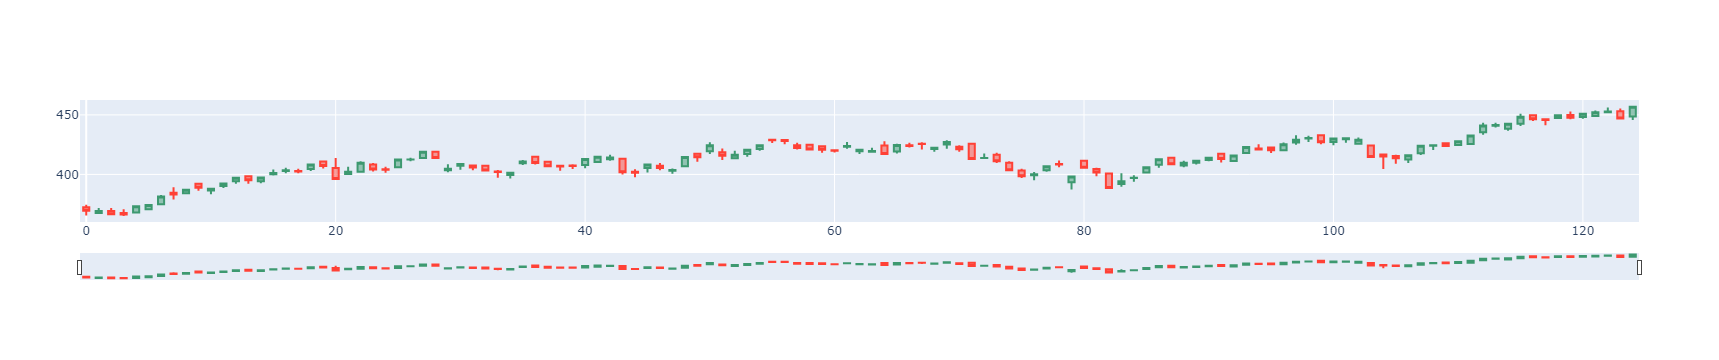

In [23]:
import plotly.graph_objects as go

# Asumiendo que data_historica es tu DataFrame y ya está definido
st = 0
dfpl = data_historica[st:st+150].copy()
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                                     open=dfpl['Open'],
                                     high=dfpl['High'],
                                     low=dfpl['Low'],
                                     close=dfpl['Close'])])

fig.show()

In [24]:
def average_next_n_candles(df, i, N):
    # Check if there are N candles after the current one
    if i + N >= len(df):
        return None

    # Compute the average closing price of the next N candles
    avg_price = df['Close'].iloc[i+1:i+N+1].mean()

    # Compare the average price to the current closing price
    if avg_price < df['Close'].iloc[i]:
            return 1
    elif avg_price > df['Close'].iloc[i]:
        return 2
    else:
        return 0
    
N=4
signal = [0]*len( data_historica)
for i in range(len( data_historica)-N):
    signal[i]= average_next_n_candles( data_historica, i, N)
    data_historica["price_target"] = signal

In [25]:
data_historica[data_historica["engulfing_signal"]==data_historica["price_target"]].count()

Date                6
Open                6
High                6
Low                 6
Close               6
Volume              6
Dividends           6
Stock Splits        6
rejection_signal    6
engulfing_signal    6
price_target        6
dtype: int64

In [26]:
equal_count = 0
different_count = 0
total_count = 0

for i in range(len(data_historica)):
    if data_historica.engulfing_signal.iloc[i] != 0:
        total_count += 1
        if data_historica.engulfing_signal.iloc[i] == data_historica.price_target.iloc[i]:
            equal_count += 1
        else:
            different_count += 1

equal_percentage = (equal_count / total_count) * 100
different_percentage = (different_count / total_count) * 100

In [27]:
print(equal_percentage, different_percentage)

42.857142857142854 57.14285714285714
